# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [81]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

In [82]:
print(df.head())
print(df.describe())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [83]:
# Your code here
def alpha_func(D, idx):
   cov_ = np.cov(D[['Sepal.Width', 'Sepal.Length']].loc[idx], rowvar=False) # https://numpy.org/doc/stable/reference/generated/numpy.cov.html
   return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [84]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [85]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.6675354865158225

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

First, the sample size is small (150 data), the calculation of mean of 'Sepal.Length' may be affected by outliers. \
Also, the mean alone does not tell us how much variability exists around that mean. 

Performaing bootstrapping can generate a distribution of the mean by repeatedly resampling the data, from which we can derive measures of variability such as the standard error. \
Also, we can construct confidence intervals. These intervals provide a range within which the true population mean is likely to lie, giving us a more nuanced understanding of the mean estimate.\
Bootstrapping also does not rely on the assumption of normality. It can be applied to any data distribution.


_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [86]:
# Add your code here to set the seed
bootstrap_values = []

def boot_SE(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    first_, second_ = 0, 0
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
        
    return np.std(np.array(bootstrap_values))

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [87]:
# Your code here
alpha_SE = boot_SE(df) #B=1000 is the default value
alpha_SE

0.03180510076860767

_(vi)_ What is the original mean value of `Sepal.Length`?

In [88]:
# Your code here
Sepal_len_mean = np.mean(df['Sepal.Length'])
print(Sepal_len_mean)

5.843333333333334


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

The bootstrapped mean is closed to the original mean.

In [89]:
# Add your code 
bootstrap_means = []

def bootstrap_samples(D, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    n = len(D) #len is enough, but shape is more universe I think
    
    for idx in range(B):
        idx = rng.choice(D,
                         n,
                         replace=True)
        value = np.mean(idx)
        bootstrap_means.append(value)

    return bootstrap_means

 
sepal_length = df['Sepal.Length']
# Generate bootstrap samples
boot_sepal_len = bootstrap_samples(sepal_length)

# Calculate bootstrapped mean and standard deviation
bootstrap_mean = np.mean(boot_sepal_len)
bootstrap_std = np.std(boot_sepal_len)

# Calculate the bootstrapped range
bootstrap_range = np.ptp(boot_sepal_len)

print(f"Original mean of Sepal.Length {Sepal_len_mean} vs bootstrapped mean value {bootstrap_mean}")
print(f"Bootstrapped standard deviation {bootstrap_std}")
print(f"Bootstrapped range {bootstrap_range}")

Original mean of Sepal.Length 5.843333333333334 vs bootstrapped mean value 5.842284666666666
Bootstrapped standard deviation 0.06649295592099295
Bootstrapped range 0.3873333333333342


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [90]:
# Add your code here
ci_lower = np.percentile(boot_sepal_len, 2.5)
ci_upper = np.percentile(boot_sepal_len, 97.5)

print(f"95% CI for the mean of iris sepal length is [{ci_lower}, {ci_upper}]")


95% CI for the mean of iris sepal length is [5.718616666666667, 5.974716666666667]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

In my opinion, this histogram is a roughly bell-shaped and symmetric distribution, which suggests that the bootstrapped sample means is approximately normal distributed. \
The peak of the histogram is centered around the mean value of approximately 5.85, which is close to the original mean of Sepal.Length. This indicates that our bootstrapped sample means are clustered around the true population mean.\
The tails of the histogram extend to about 5.65 on the lower end and 6.00 on the upper end, also mathces our 95% confidence interval.

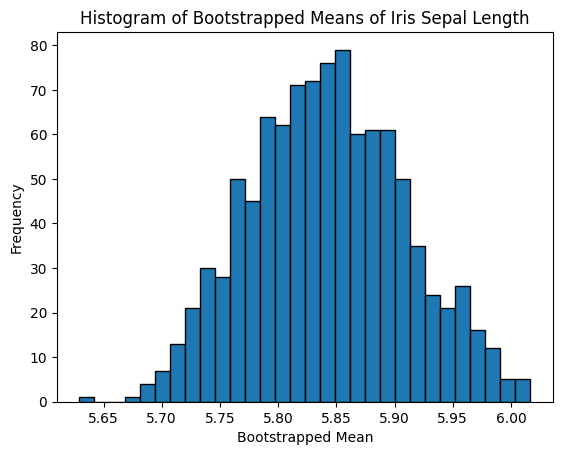

In [91]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(boot_sepal_len, bins=30, edgecolor='black')

# Add a title
#Add your code here
ax.set_title('Histogram of Bootstrapped Means of Iris Sepal Length')

# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Bootstrapped Mean')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 


We estimated the mean sepal length is around 5.84 cm, we would suggest the shipping company to use it for general planning the space allocation for the packaging and the shipment.\
But there also exists some variability. The 95% confidence interval for the mean sepal length ranges from approximately 5.72 cm to 5.96 cm. This interval suggests that we can be 95% confident that the true mean sepal length falls within this range. \
To ensure a cautious and conservative approach to space allocation, it is advisable to use the upper bound of the 95% confidence interval, which is approximately 6.0 cm. This conservative estimate accounts for variability and ensures that there is sufficient space to accommodate the longest sepals within the typical range.


In [92]:
# Write your answer here
#I answered above.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
